In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Census data files
census_state_path_2015 = "Output/2015_cleaned_state.csv"

In [3]:
# Read the Census data
census_state_results_2015 = pd.read_csv(census_state_path_2015)

In [4]:
census_state_results_2015.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,Alabama,4830620,2341093,2489527,193159,3204658,1270556,22007,59324,1089,...,20994,56260,25,1583312,329430,105863,3715,910480,1318475,454437
1,Alaska,733375,384160,349215,47860,457438,23611,98381,42323,8638,...,19750,16083,10,240061,88175,22190,634,74612,99617,61930
2,Arizona,6641928,3299088,3342840,2015055,3751927,263011,265835,193799,11587,...,77252,156279,21,2230882,412325,166404,5502,1210351,1724490,603924
3,Arkansas,2958208,1451913,1506295,203216,2177095,456609,16531,39968,6628,...,15580,40259,22,969630,205337,78614,2406,571519,821223,231142
4,California,38421464,19087135,19334329,14746502,14878698,2157932,144676,5192680,133245,...,437377,917120,24,13403787,2381720,1434085,34099,6260461,8451647,3845611


In [5]:
#Data Collection for Census data
total_pop = census_state_results_2015["TotalPop"].sum()
men = census_state_results_2015["Men"].sum()/total_pop * 100
women= census_state_results_2015["Women"].sum()/total_pop * 100
employed_num = census_state_results_2015["Employed"].sum()
employed = census_state_results_2015["Employed"].sum()/total_pop * 100
service = census_state_results_2015["Service"].sum()/employed_num * 100
office = census_state_results_2015["Office"].sum()/employed_num * 100
construction = census_state_results_2015["Construction"].sum()/employed_num * 100
production = census_state_results_2015["Production"].sum()/employed_num * 100
drive = census_state_results_2015["Drive"].sum()/employed_num * 100
carpool = census_state_results_2015["Carpool"].sum()/employed_num * 100
transit = census_state_results_2015["Transit"].sum()/employed_num * 100
walk = census_state_results_2015["Walk"].sum()/employed_num * 100
workathome = census_state_results_2015["WorkatHome"].sum()/employed_num * 100
privatework = census_state_results_2015["PrivateWork"].sum()/employed_num * 100
publicwork = census_state_results_2015["PublicWork"].sum()/employed_num * 100
selfemployed = census_state_results_2015["SelfEmployed"].sum()/employed_num * 100
familywork = census_state_results_2015["FamilyWork"].sum()/employed_num * 100
poverty = census_state_results_2015["Poverty"].sum()/employed_num * 100
childpoverty = census_state_results_2015["ChildPoverty"].sum()/total_pop * 100
unemployment = census_state_results_2015["Unemployment"].sum()/total_pop * 100

In [6]:
state_summary_2015_df = pd.DataFrame({"Total Pop": [total_pop],
                           "Men%": [men],
                           "Women%": [women],
                           "Employed%": [employed],
                           "Service%": [service],
                           "Office%": [office],
                           "Construction%": [construction],
                           "Production%": [production],
                           "Drive%": [drive],
                           "Carpool%": [carpool],
                           "Transit%": [transit],
                           "Walk%": [walk],
                           "WorkatHome%": [workathome],
                           "Privatework%": [privatework],
                           "Publicwork%": [publicwork],
                           "Selfemployed%": [selfemployed],
                           "Familywork%": [familywork],
                           "Poverty%": [poverty],
                           "Childpoverty%": [childpoverty],
                           "Selfemployed%": [selfemployed],
                           "Unemployment%": [unemployment]})           
                          
             
state_summary_2015_df .style.format({"Total Pop":"{:,}",
                         "Men%":"{:,.2f}%",
                         "Women%":"{:,.2f}%",
                         "Employed%":"{:,.2f}%",
                         "Service%":"{:,.2f}%",
                         "Office%":"{:,.2f}%",
                         "Construction%":"{:,.2f}%",
                         "Production%":"{:,.2f}%",
                         "Drive%":"{:,.2f}%",
                         "Carpool%":"{:,.2f}%",
                         "Transit%":"{:,.2f}%",
                          "Walk%":"{:,.2f}%",
                          "WorkatHome%":"{:,.2f}%",
                          "Privatework%":"{:,.2f}%",
                          "Publicwork%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Familywork%":"{:,.2f}%",
                          "Poverty%":"{:,.2f}%",
                          "Childpoverty%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Unemployment%":"{:,.2f}%"})  

,Total Pop,Men%,Women%,Employed%,Service%,Office%,Construction%,Production%,Drive%,Carpool%,Transit%,Walk%,WorkatHome%,Privatework%,Publicwork%,Selfemployed%,Familywork%,Poverty%,Childpoverty%,Unemployment%
0,"320,098,094",49.19%,50.81%,45.86%,18.16%,24.11%,8.95%,12.15%,76.42%,9.44%,5.13%,2.79%,4.40%,79.43%,14.36%,6.05%,0.16%,34.53%,22.04%,8.49%


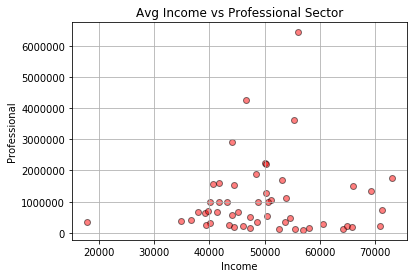

In [7]:
plt.scatter(census_state_results_2015["Income"],census_state_results_2015["Professional"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Professional")
plt.title(f"Avg Income vs Professional Sector")
# plt.savefig("../output_data//Avg Income vs Professional Sector.png")
plt.grid()
plt.show()

The r-squared is: 0.004399904622446995


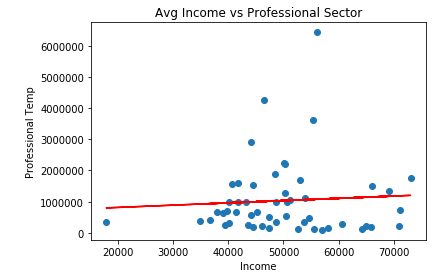

In [8]:
x_value = census_state_results_2015["Income"]
y_value = census_state_results_2015["Professional"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(5, 40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Avg Income vs Professional Sector")
plt.xlabel("Income")
plt.ylabel("Professional Sector")
# plt.savefig("../output_data//Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In [9]:
plt.figure(figsize=(15, 10))
plt.bar(x, y, color="blue", alpha=1, align="center")
plt.xlim(-.75, len(x)+.75)
plt.ylim(0, max(y)+25)
plt.title("Avg Income vs Professional Sector")
plt.xlabel("Income")
plt.ylabel("Professional Sector")
tick_locations = [value for value in x]
plt.xticks(tick_locations, rotation=90)
plt.show()

NameError: name 'x' is not defined

<Figure size 1080x720 with 0 Axes>